# PHYS7332 Assignment 1
- Name: Minami Ueda
- Date: September 24, 2024

In [3]:
import networkx as nx
import numpy as np
import itertools

In [4]:
%config InlineBackend.figure_format = 'retina'

***
## Question 3

***
### Question 3(a): Betweenness centrality

The betweenness centrality of a node $v$ is calculated by the following equation
$$
C_B(v) = \sum_{s \neq v \neq t \in V} \frac{\sigma(s,t|v)}{\sigma(s, t)}
$$
where $V$ is the set of nodes, $\sigma(s,t)$ denotes the number of shortest paths from starting node $s$ to target node $t$, and $\sigma(s,t|v)$ denotes the number of such paths that passes through node $v$. In other word, the betweenness centrality is the sum of the fraction of shortest paths from $s$ to $t$ that passes through $v$.

The following `betweenness_centrality_from_scratch_for_single_node(G, node)` implementation calculates the betweenness centrality for a node in given graph $G$, and returns the result as a dictionary with node-value pairs. The algorithm is consisted of following steps:
- Find the possible node pairs in a graph $G$
    - For a undirected graph, we use combination since edges $(s,t)$ and $(t,s)$ are the same thing
    - For a directed graph, we use permutation since edges $(s,t)$ and $(t,s)$ are different
- Calculate the betweenness centrality for the node by:
    - Iterate through node pairs from $s$ to $t$ to count those that passes through node $v$
    - Calculate the fraction of the path passing node $v$ and sum them
    - Store the result into a dictionary with node number as a key, and the betweenness centrality as the value.
    - Normalize the betweenness centrality

Refrences:
- Ulrik Brandes: A Faster Algorithm for Betweenness Centrality. Journal of Mathematical Sociology 25(2):163-177, 2001. https://doi.org/10.1080/0022250X.2001.9990249
- NetworkX. betweenness_centrality | NetworkX 3.3 documentation. https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html

#### Scratch implementation (for a single node)

In [306]:
def betweenness_centrality_from_scratch_for_single_node(G, node):
    """
    Calculate the betweenness centrality for a node in a graph from scratch.

    Parameters
    ----------
    G : networkx.Graph
        The input graph on which the betweenness centrality is calculated. It can be
        any type of graph (undirected, directed, etc.) supported by NetworkX.

    node: str or int
        The label for the node that you want to calculate the betweenness centrality.

    Returns
    -------
    centrality : int or float
       Betweenness centrality for the node
       
    """
    
    nodes = G.nodes
    N = len(nodes)

    centrality = 0

    # We use different functions to find node pairs for directed and undirected graph
    # Normalization constant is also different
    directed = G.is_directed()
    if directed:
        iteration_function = itertools.permutations
        normalization_constant = ((N-1)*(N-2)) # Choose 2 from (N-1) * 2
    else:
        # Avoid counting same edges (s,t) and (t,s) twice!
        iteration_function = itertools.combinations
        normalization_constant = ((N-1)*(N-2))/2 # Choose 2 from (N-1)

    
    # Loop through node pairs
    for s, t in iteration_function(nodes, 2):
        
        # If v is either source node s or target node t, the numerator part sigma(s,t|v) = 0
        if node in {s, t}:
            continue

        # Get all shortest paths between s and t
        shortest_paths = list(nx.all_shortest_paths(G, source=s, target=t))
        N_shortest_paths = len(shortest_paths)

        # Count how many of the shortest paths go through v
        paths_through_v = sum(1 for path in shortest_paths if node in path[1:-1])  # Since nodes in each path are stored as a list, we ignore the first and the last element (s and t)
        
        if N_shortest_paths > 0:
            centrality += paths_through_v / N_shortest_paths

    # Normalize betweenness values 
    centrality = centrality / normalization_constant
        
    return centrality


##### Undirected graph

In [145]:
G = nx.karate_club_graph()
nodes_list = list(G.nodes())

In [146]:
betweenness_centrality_from_scratch_for_single_node(G, 0)

0.4376352813852816

##### Directed graph

In [147]:
G_directed = G.to_directed()

In [148]:
betweenness_centrality_from_scratch_for_single_node(G_directed, 0)

0.437635281385281

#### Additional implementation: Scratch implementation for all nodes in a graph
Since I initially started working on the implementation for **all nodes in a graph**, I will keep the works here.

In [149]:
def betweenness_centrality_from_scratch(G):
    """
    Calculate the betweenness centrality for each node in a graph from scratch.

    Parameters
    ----------
    G : networkx.Graph
        The input graph on which the betweenness centrality is calculated. It can be
        any type of graph (undirected, directed, etc.) supported by NetworkX.

    Returns
    -------
    centrality : dict
        A dictionary where the keys are nodes in the graph and the values are
        their corresponding betweenness centrality scores.
    """
    
    nodes = G.nodes
    N = len(nodes)

    # Prepare a dictionary to store centrality measure for each node
    centrality = {node: 0 for node in nodes}

    # We use different functions to find node pairs for directed and undirected graph
    # Normalization constant is also different
    directed = G.is_directed()
    if directed:
        iteration_function = itertools.permutations
        normalization_constant = ((N-1)*(N-2)) # Choose 2 from (N-1) * 2
    else:
        # Avoid counting same edges (s,t) and (t,s) twice!
        iteration_function = itertools.combinations
        normalization_constant = ((N-1)*(N-2))/2 # Choose 2 from (N-1)

    # Calculate betweenness centrality for all nodes
    for v in nodes:
        
        # Loop through node pairs
        for s, t in iteration_function(nodes, 2):
            
            # If v is either source node s or target node t, the numerator part sigma(s,t|v) = 0
            if v in {s, t}:
                continue

            # Get all shortest paths between s and t
            shortest_paths = list(nx.all_shortest_paths(G, source=s, target=t))
            N_shortest_paths = len(shortest_paths)

            # Count how many of the shortest paths go through v
            paths_through_v = sum(1 for path in shortest_paths if v in path[1:-1])  # Since nodes in each path are stored as a list, we ignore the first and the last element (s and t)
            
            if N_shortest_paths > 0:
                centrality[v] += paths_through_v / N_shortest_paths

        # Normalize betweenness values 
        centrality[v] = centrality[v] / normalization_constant
        
    return centrality


##### Undirected graph

In [41]:
betweenness_centrality_nx = nx.betweenness_centrality(G, normalized=True)

In [43]:
betweenness_centrality_scratch = betweenness_centrality_from_scratch(G)
betweenness_centrality_scratch

{0: 0.4376352813852816,
 1: 0.0539366883116883,
 2: 0.1436568061568063,
 3: 0.011909271284271286,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.02998737373737374,
 7: 0.0,
 8: 0.05592682780182779,
 9: 0.0008477633477633477,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.045863395863395835,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004808,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.01761363636363637,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.022333453583453584,
 28: 0.0017947330447330445,
 29: 0.0029220779220779218,
 30: 0.014411976911976923,
 31: 0.13827561327561325,
 32: 0.14524711399711399,
 33: 0.3040749759499759}

In [44]:
# Check differences between the networkx implementation and scratch implementation
betweenness_centrality_diff = {node: 0 for node in G.nodes()}
for i in betweenness_centrality_nx.keys():
    diff =  betweenness_centrality_nx[i] - betweenness_centrality_scratch[i]
    betweenness_centrality_diff[i] = diff

In [45]:
betweenness_centrality_diff

{0: -1.6653345369377348e-16,
 1: 6.938893903907228e-18,
 2: -1.1102230246251565e-16,
 3: -3.469446951953614e-18,
 4: 0.0,
 5: 0.0,
 6: -3.469446951953614e-18,
 7: 0.0,
 8: 2.0816681711721685e-17,
 9: 1.0842021724855044e-19,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 2.7755575615628914e-17,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 2.7755575615628914e-17,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: -6.938893903907228e-18,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: -3.469446951953614e-18,
 28: 2.168404344971009e-19,
 29: 0.0,
 30: -1.3877787807814457e-17,
 31: 0.0,
 32: 2.7755575615628914e-17,
 33: 5.551115123125783e-17}

##### Directed graph

In [31]:
betweenness_centrality_directed_nx =nx.betweenness_centrality(G_directed, normalized=True)

In [47]:
betweenness_centrality_directed_scratch = betweenness_centrality_from_scratch(G_directed)
betweenness_centrality_directed_scratch

{0: 0.437635281385281,
 1: 0.053936688311688304,
 2: 0.14365680615680623,
 3: 0.01190927128427128,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.02998737373737374,
 7: 0.0,
 8: 0.05592682780182777,
 9: 0.0008477633477633476,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339588,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004808,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882162,
 26: 0.0,
 27: 0.022333453583453566,
 28: 0.0017947330447330445,
 29: 0.0029220779220779218,
 30: 0.014411976911976904,
 31: 0.1382756132756134,
 32: 0.14524711399711399,
 33: 0.3040749759499759}

In [33]:
betweenness_centrality_directed_diff = {node: 0 for node in G.nodes()}
for i in betweenness_centrality_directed_nx.keys():
    diff =  betweenness_centrality_directed_nx[i] - betweenness_centrality_directed_scratch[i]
    betweenness_centrality_directed_diff[i] = diff

In [46]:
betweenness_centrality_directed_diff

{0: 4.440892098500626e-16,
 1: 0.0,
 2: -5.551115123125783e-17,
 3: 3.469446951953614e-18,
 4: 0.0,
 5: 0.0,
 6: -3.469446951953614e-18,
 7: 0.0,
 8: 4.163336342344337e-17,
 9: 2.168404344971009e-19,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: -1.3877787807814457e-17,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 2.7755575615628914e-17,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: -8.673617379884035e-19,
 26: 0.0,
 27: 1.3877787807814457e-17,
 28: 2.168404344971009e-19,
 29: 0.0,
 30: 5.204170427930421e-18,
 31: -1.6653345369377348e-16,
 32: 2.7755575615628914e-17,
 33: 5.551115123125783e-17}

***
### Question 3(b): Error handling
New function `betweenness_centrality_from_scratch_for_single_node_with_error_handling(G,node)` adds following 4 error handling:
- i. A node that is not in the graph
- ii. A graph that is not a networkx object
- iii. A graph with no connectivity (or not enough connectivity to produce a valid
centrality result)
- iv. Any situation that might produce numerical difficulties (e.g. dividing by zero) for your chosen centrality measure

In [103]:
nx.classes.graph

<module 'networkx.classes.graph' from '/courses/PHYS7332.202510/shared/phys7332-env/lib/python3.12/site-packages/networkx/classes/graph.py'>

In [117]:
type(G)

networkx.classes.graph.Graph

In [461]:
def betweenness_centrality_from_scratch_for_single_node_with_error_handling(G, node):
    """
    Calculate the betweenness centrality for a node in a graph from scratch.

    Parameters
    ----------
    G : networkx.Graph
        The input graph on which the betweenness centrality is calculated. It can be
        any type of graph (undirected, directed, etc.) supported by NetworkX.

    node: str or int
        The label for the node that you want to calculate the betweenness centrality.

    Returns
    -------
    centrality : int or float
       Betweenness centrality for the node
       
    """

    # Exception (ii): A graph that is not a networkx object
    if not isinstance(G, nx.Graph):
        raise TypeError("The graph is not a networkx object.")
        return
        
    nodes = G.nodes

    # Exception (i): A node that is not in the graph
    if node not in nodes:
        raise LookupError("The node is not in the given graph.")
        return

    # Exception (iii): A graph with no connectivity
    if len(G.edges(node)) == 0:
        raise ArithmeticError("The edge does not have connectivity")
        return
        
    N = len(nodes)

    centrality = 0

    # We use different functions to find node pairs for directed and undirected graph
    # Normalization constant is also different
    directed = G.is_directed()
    if directed:
        iteration_function = itertools.permutations
        normalization_constant = ((N-1)*(N-2)) # Choose 2 from (N-1) * 2
    else:
        # Avoid counting same edges (s,t) and (t,s) twice!
        iteration_function = itertools.combinations
        normalization_constant = ((N-1)*(N-2))/2 # Choose 2 from (N-1)

    # Loop through node pairs
    for s, t in iteration_function(nodes, 2):
        
        # If v is either source node s or target node t, the numerator part sigma(s,t|v) = 0
        if node in {s, t}:
            continue

        # Get all shortest paths between s and t
        shortest_paths = list(nx.all_shortest_paths(G, source=s, target=t))
        N_shortest_paths = len(shortest_paths)

        # Count how many of the shortest paths go through v
        paths_through_v = sum(1 for path in shortest_paths if node in path[1:-1])  # Since nodes in each path are stored as a list, we ignore the first and the last element (s and t)

        # Exception (iv): Avoid numerical difficulties trying to divide by zero
        if N_shortest_paths == 0:
            raise ZeroDivisionError("Cannot calculate centrality.")
        elif N_shortest_paths > 0:
            centrality += paths_through_v / N_shortest_paths

    # Normalize betweenness values 
    centrality = centrality / normalization_constant
        
    return centrality


#### Check error handling

In [462]:
# Node 10000 does not exist in the given graph
betweenness_centrality_from_scratch_for_single_node_with_error_handling(G, 10000)

LookupError: The node is not in the given graph.

In [463]:
# Pass non-graph object as G
not_a_graph_G = "foo" # This is a string!
betweenness_centrality_from_scratch_for_single_node_with_error_handling(not_a_graph_G, 1)

TypeError: The graph is not a networkx object.

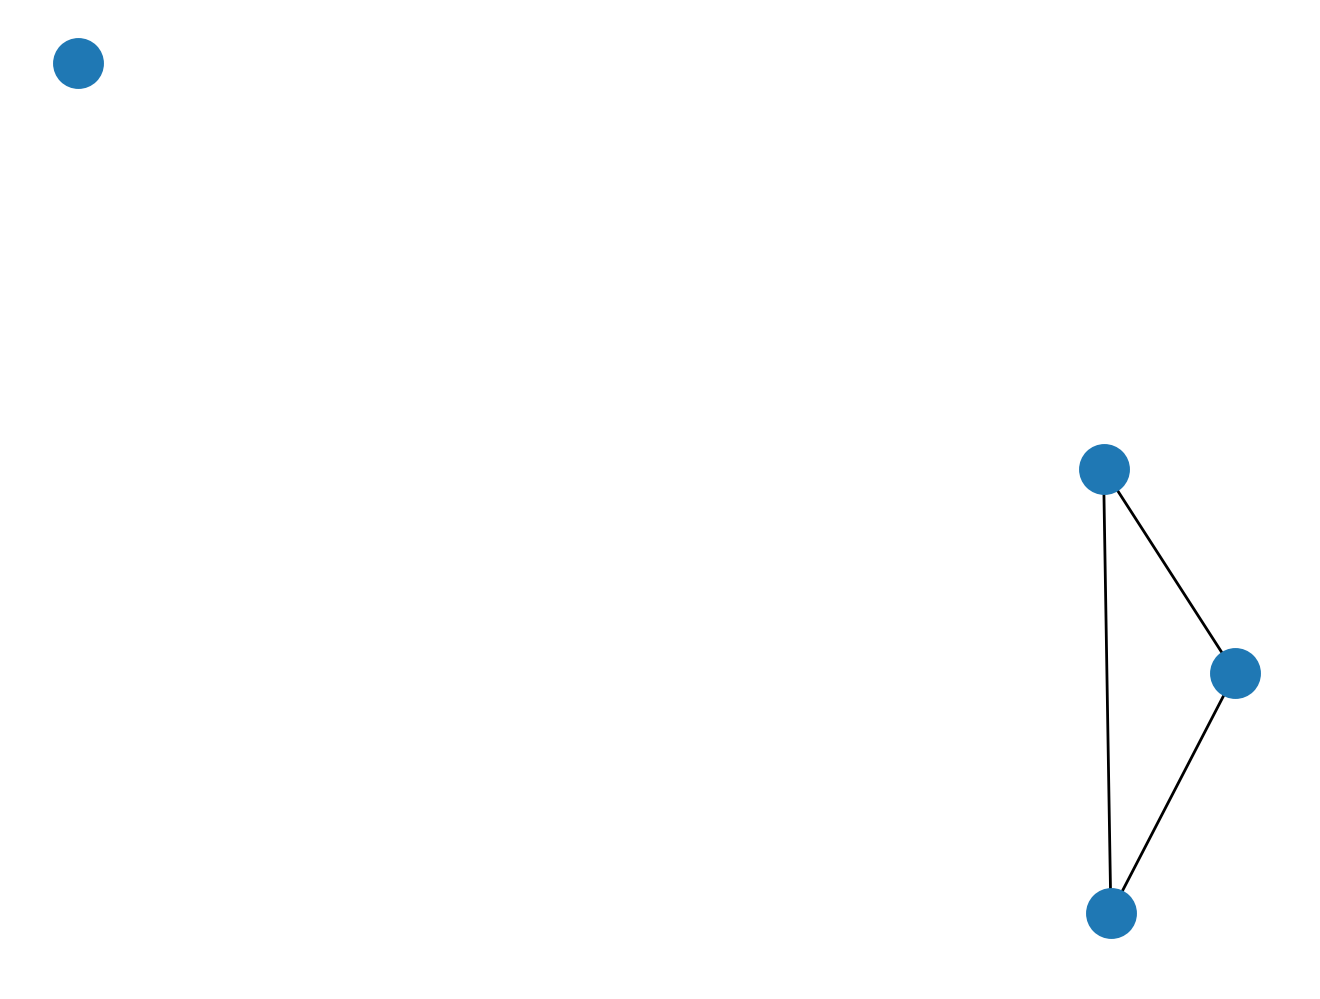

In [464]:
# Make a graph with a node that doesn't have connectivity
# *Probably needs to address other cases too
G_with_no_connectivity = nx.Graph()
G_with_no_connectivity.add_node(1) # A node without any edge
G_with_no_connectivity.add_node(2)
G_with_no_connectivity.add_node(3)
G_with_no_connectivity.add_node(4)
G_with_no_connectivity.add_edge(2,3) # Nodes 2 and 3 are connected
G_with_no_connectivity.add_edge(2,4) # Nodes 2 and 4 are connected
G_with_no_connectivity.add_edge(3,4) # Nodes 3 and 4 are connected
nx.draw(G_with_no_connectivity)

In [465]:
betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_with_no_connectivity, 1)

ArithmeticError: The edge does not have connectivity

***
### Question 3(c): Comparison with `networkx` functions
Here, we compare the scratch implementation with the `networkx` implementation using the following network data:
- Karate club, undirected
- Random Graph (generated with E-R model), undirected
- Karate club, directed
- Random Graph (generated with E-R model), directed
- Graph with no connectivity

In [609]:
# Function that compares to which decimal point 2 values match
# If 2 values matches, it returns True
def compare_decimal_places(num1, num2):
    if num1 == num2:
        return True

    decimal_places = 0
    while True:
        # We compare until the 20-th decimal point
        if decimal_places >= 20:
            break
        
        num1 *= 10
        num2 *= 10
        diff = abs(num1 - num2)
        
        if diff >= 1:
            break
        
        decimal_places += 1


    return decimal_places

In [552]:
# Match until the seventh decimal point
compare_decimal_places(
    0.12345678,
    0.1234567,
)

7

#### Karate club, undirected

In [553]:
G_karate = nx.karate_club_graph()

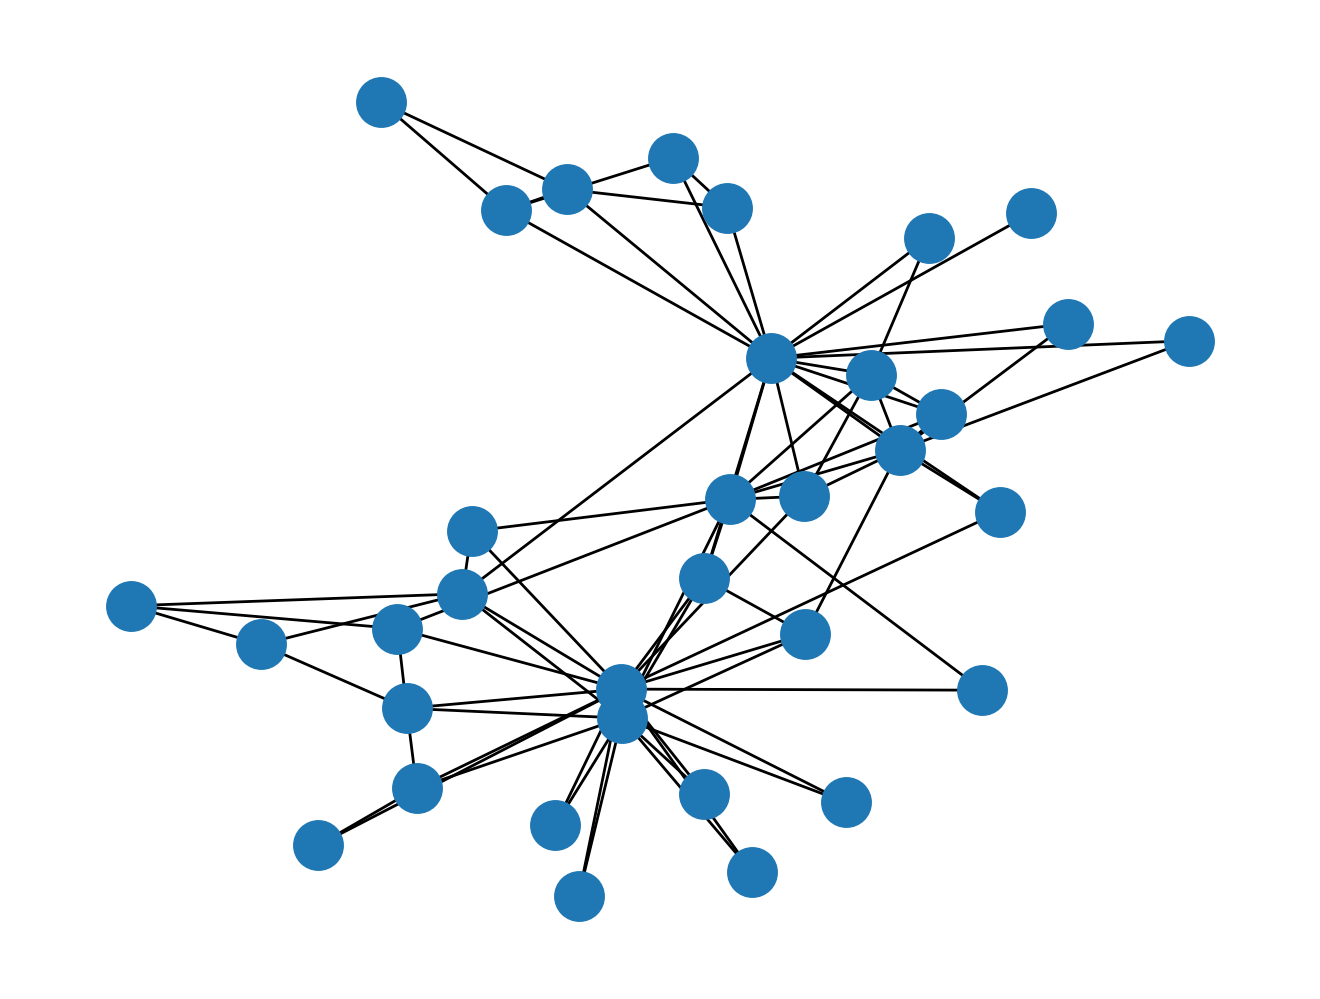

In [554]:
nx.draw(G_karate)

In [555]:
betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_karate, 0)

0.4376352813852816

In [556]:
nx.betweenness_centrality(G_karate)[0]

0.43763528138528146

In [557]:
compare_decimal_places(
    betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_karate, 0),
    nx.betweenness_centrality(G_karate)[0]
)

15

#### Random graph, undirected

In [558]:
# Random graph
G_random = nx.gnm_random_graph(10,30,0)

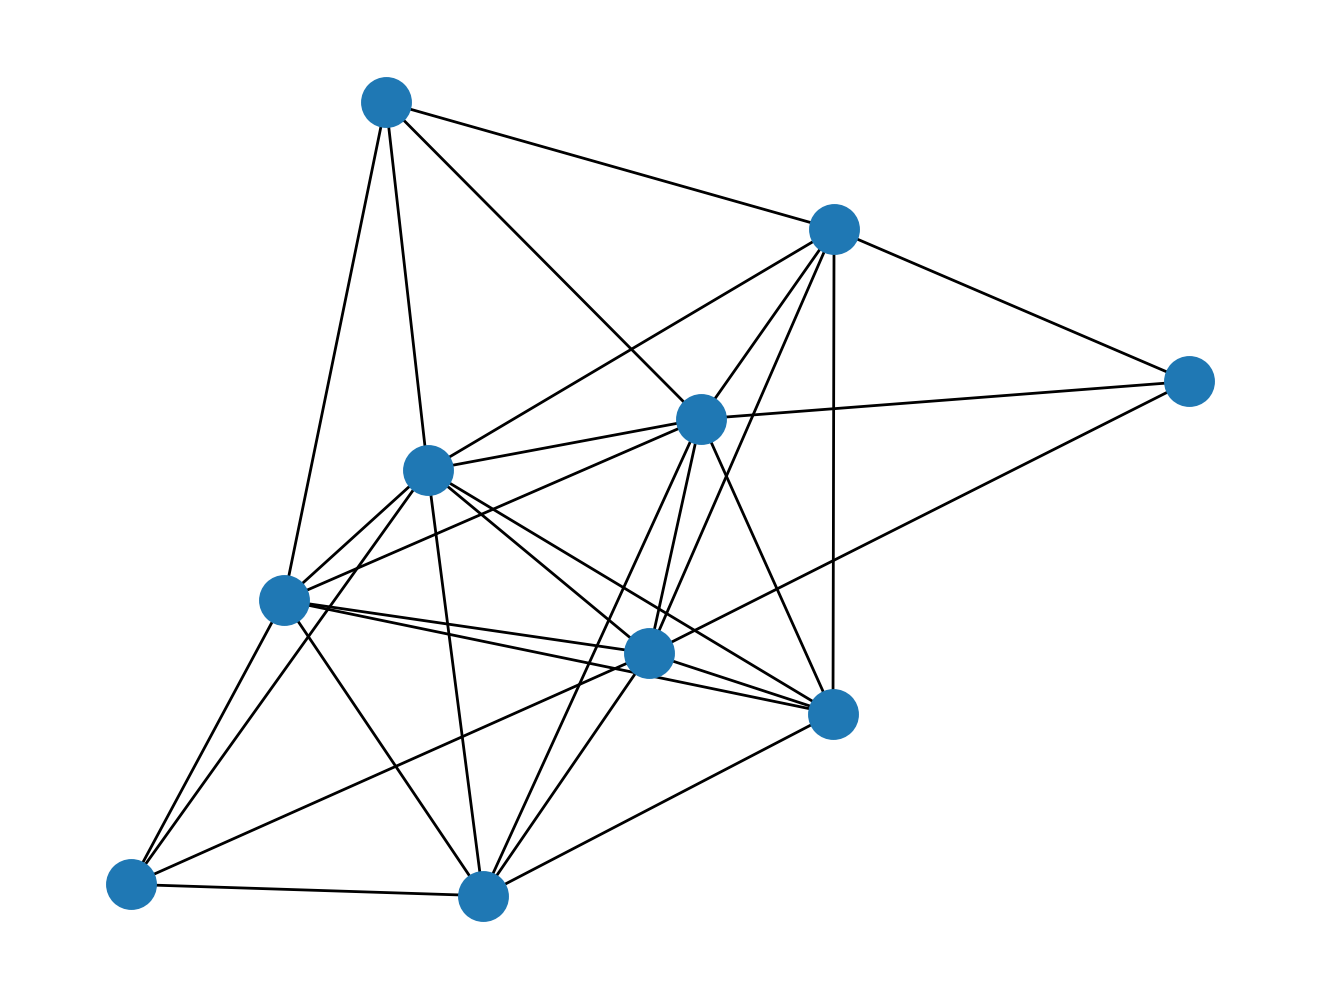

In [559]:
nx.draw(G_random)

In [560]:
betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_random, 5)

0.046296296296296294

In [561]:
nx.betweenness_centrality(G_random)[5]

0.046296296296296294

In [562]:
compare_decimal_places(
    betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_random, 5),
    nx.betweenness_centrality(G_random)[5]
)

True

#### Karate club, directed

In [563]:
G_karate_directed = G_karate.to_directed()

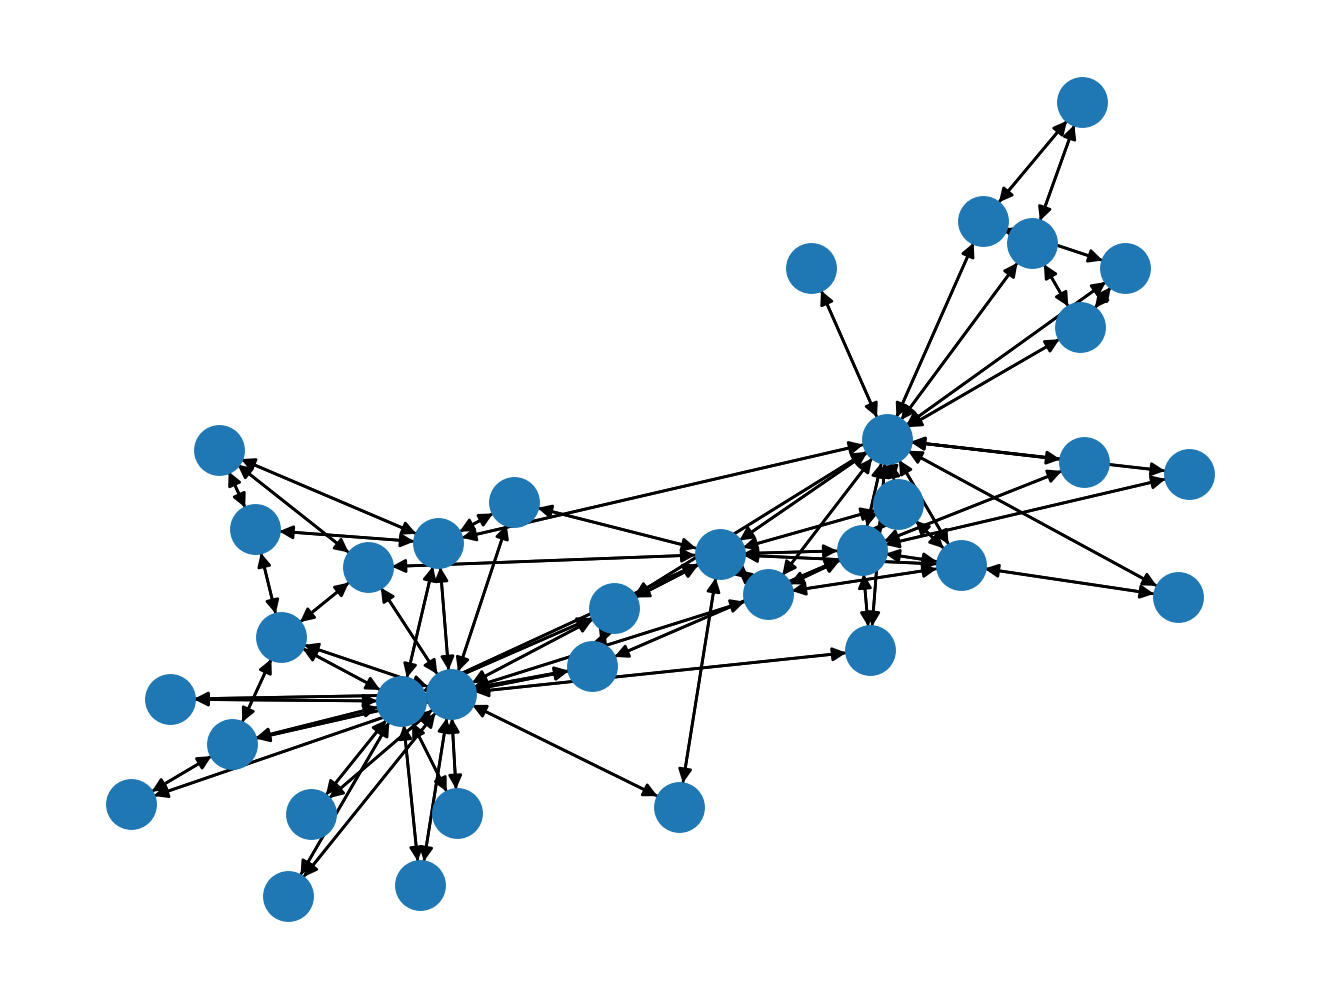

In [564]:
nx.draw(G_karate_directed)

In [565]:
betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_karate_directed, 0)

0.437635281385281

In [566]:
nx.betweenness_centrality(G_karate_directed)[0]

0.43763528138528146

In [567]:
compare_decimal_places(
    betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_karate_directed, 0),
    nx.betweenness_centrality(G_karate_directed)[0]
)

15

#### Random graph, directed

In [568]:
G_random_directed = nx.gnm_random_graph(10,40, 0, directed=True)

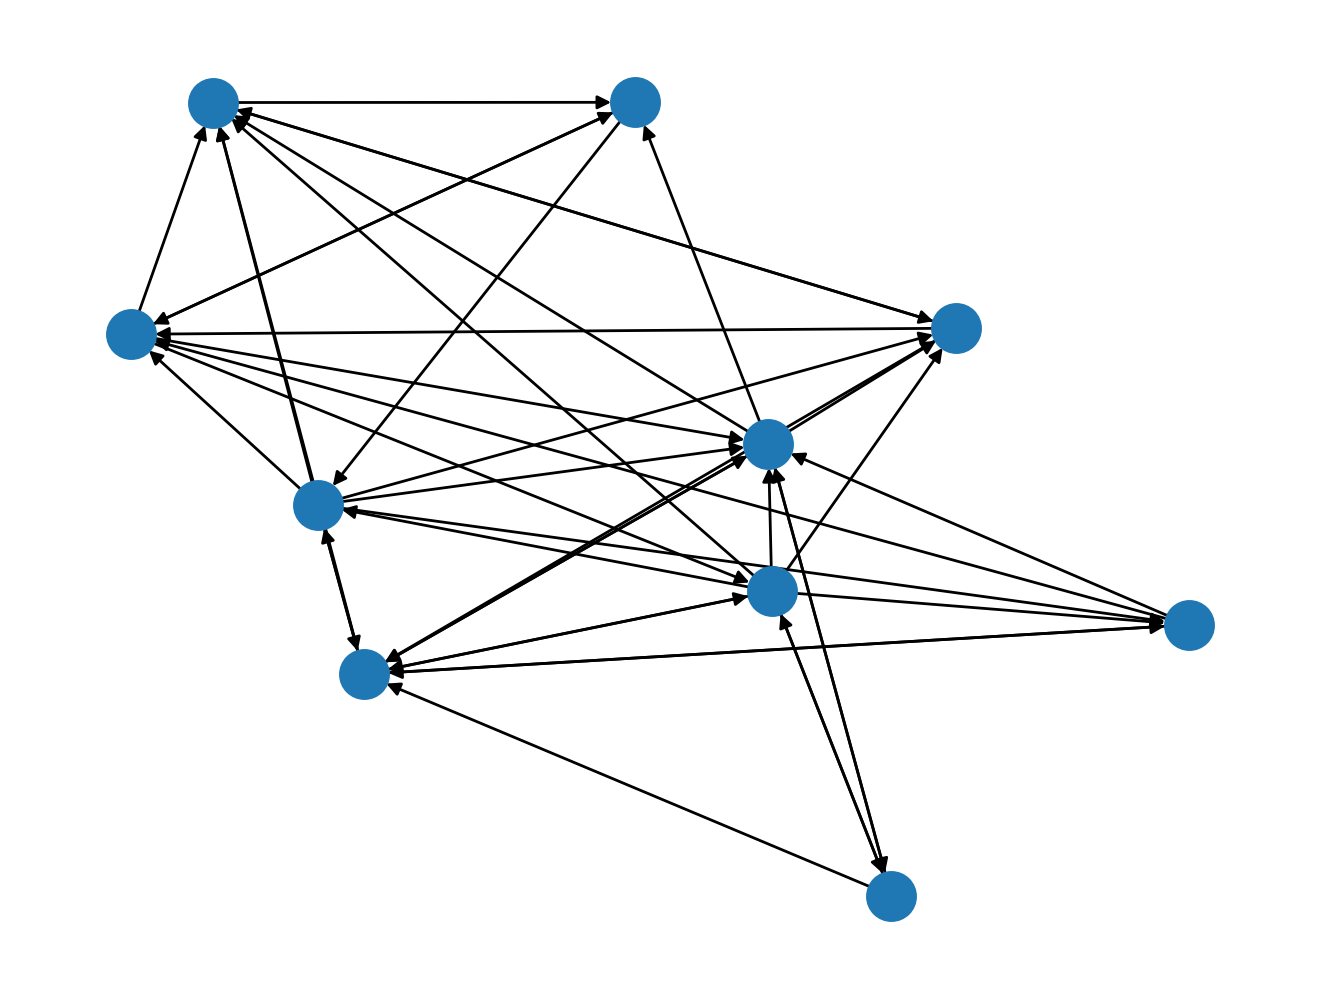

In [569]:
nx.draw(G_random_directed)

In [570]:
betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_random_directed, 5)

0.150297619047619

In [571]:
nx.betweenness_centrality(G_random_directed)[5]

0.15029761904761904

In [572]:
compare_decimal_places(
    betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_random_directed, 5),
    nx.betweenness_centrality(G_random_directed)[5]
)

16

#### Graph with no connectivitity

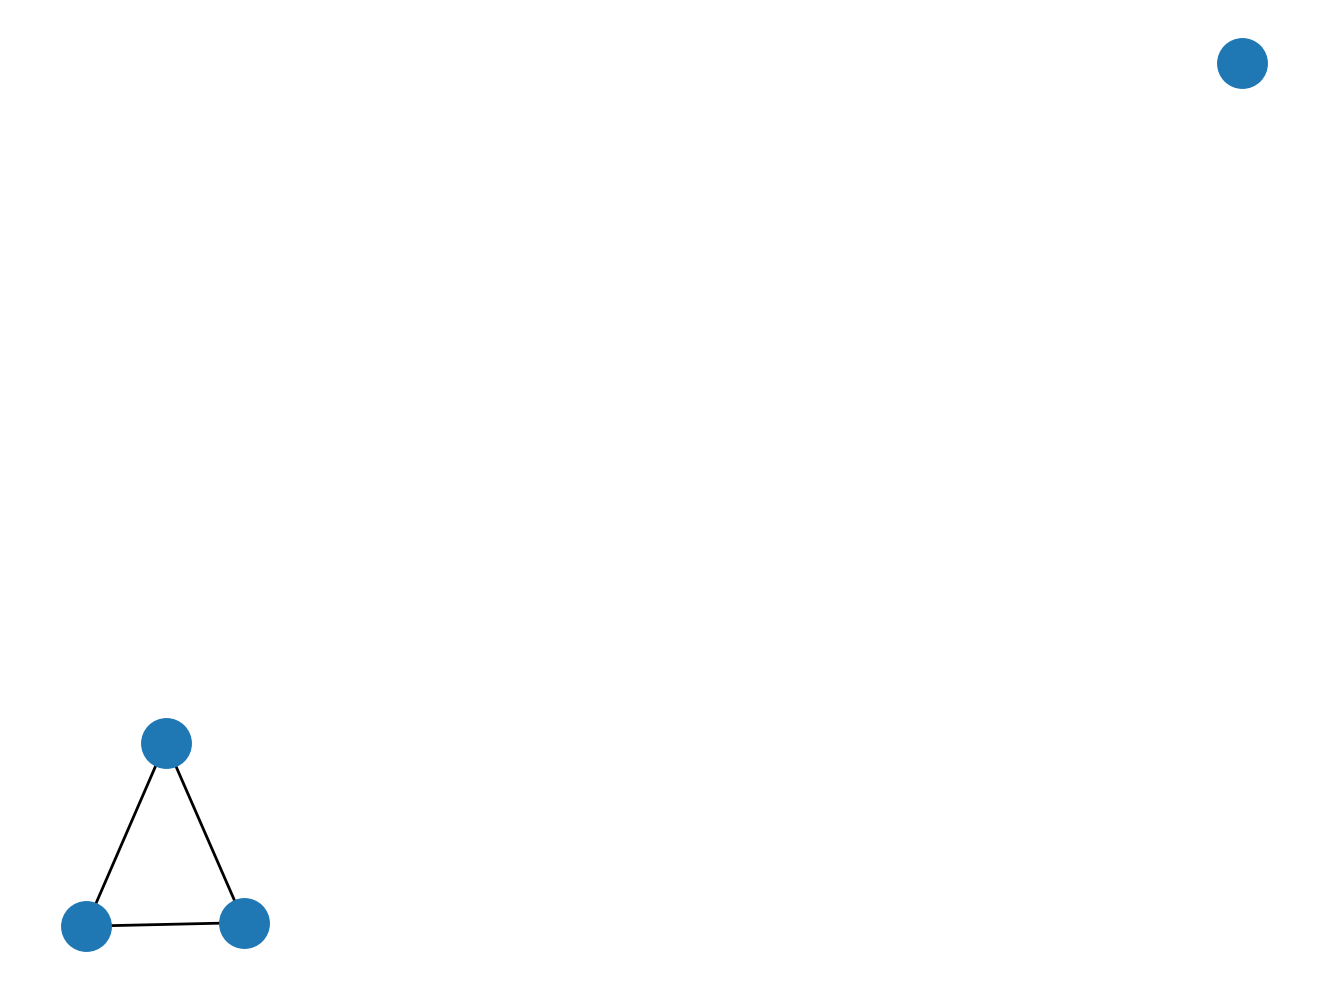

In [573]:
# Node 1 is disconnected, others are connected
nx.draw(G_with_no_connectivity)

In [574]:
betweenness_centrality_from_scratch_for_single_node_with_error_handling(G_with_no_connectivity, 2)

NetworkXNoPath: Target 3 cannot be reached from given sources

In [ ]:
nx.betweenness_centrality(G_with_no_connectivity)[2]

***
### Question 3(d): Test function


In [636]:
def test_centrality_function(centrality_func, reference_centrality_function):

    G_karate = nx.karate_club_graph()
    G_karate_directed = G_karate.to_directed()
    G_random = nx.gnm_random_graph(10,30,0)
    G_random_directed = nx.gnm_random_graph(10,30,0,directed=True)

    G_random_no_connect = G_random.copy()
    G_random_no_connect.remove_edges_from(list(G_random_no_connect.edges(1)))
    G_random_no_connect.remove_edges_from(list(G_random_no_connect.edges(2)))
    G_random_no_connect.remove_edges_from(list(G_random_no_connect.edges(3)))
  
    G_random_directed_no_connect = G_random_directed.copy()
    G_random_directed_no_connect.remove_edges_from(list(G_random_directed_no_connect.edges(1)))
    G_random_directed_no_connect.remove_edges_from(list(G_random_directed_no_connect.edges(2)))
    G_random_directed_no_connect.remove_edges_from(list(G_random_directed_no_connect.edges(3)))
    
    graphs = [G_karate, G_karate_directed, G_random, G_random_directed, G_random_no_connect, G_random_directed_no_connect]

    def is_centrality_measure_match(centrality_func, reference_centrality_function, G):

        cent_val = np.nan
        try:
            cent_val = centrality_func(G, 1)
        except:
            pass

        print("Your centrality: {}".format(cent_val))
        
        
        cent_val_ref = np.nan
        try:
            cent_val_ref = reference_centrality_function(G)[1]
        except:
            pass

        print("Networkx centrality: {}".format(cent_val_ref))
        
        
        mathing_decimal_places = 0
        if np.isnan(cent_val) or np.isnan(cent_val_ref):
            pass
        else:
            try:
                mathing_decimal_places = compare_decimal_places(cent_val,cent_val_ref)
            except:
                pass

        if cent_val == np.nan or cent_val_ref == np.nan:
            res = False
        elif (cent_val == cent_val_ref) and (cent_val != np.nan and cent_val_ref != np.nan):
            res = True
        elif mathing_decimal_places>=15:
            res = True
        else:
            res = False

        return res

    test_result = []
    for G in graphs:
        print(G)
        is_match = is_centrality_measure_match(centrality_func, reference_centrality_function, G)
        test_result.append(is_match)

    return test_result


In [637]:
test_centrality_function(
    betweenness_centrality_from_scratch_for_single_node_with_error_handling,
    nx.betweenness_centrality
)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
Your centrality: 0.0539366883116883
Networkx centrality: 0.053936688311688304
DiGraph named "Zachary's Karate Club" with 34 nodes and 156 edges
Your centrality: 0.053936688311688304
Networkx centrality: 0.053936688311688304
Graph with 10 nodes and 30 edges
Your centrality: 0.09583333333333333
Networkx centrality: 0.09583333333333333
DiGraph with 10 nodes and 30 edges
Your centrality: nan
Networkx centrality: 0.08726851851851851
Graph with 10 nodes and 13 edges
Your centrality: nan
Networkx centrality: 0.0
DiGraph with 10 nodes and 23 edges
Your centrality: nan
Networkx centrality: 0.0


[True, True, True, False, False, False]

In [638]:
# The scratch function returns the same (almost same) value for the first three graphs.
# Note that it only tests for a specific node, not the entire graph.

***
## Question 4

In [641]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import itertools

### Question 4(a): Scrape course catalog including prerequisites

In [642]:
def get_course_info(dept_html):
    """
    Given a string of raw html (dept_html) that contains a department's course titles and descriptions,
    return a useful data structure that contains the titles, descriptions, and prerequisites.

    Parameters
    ----------
    dept_html: str
        Raw HTML text of a course catalog page for a specific department.
        An example page would be https://catalog.northeastern.edu/course-descriptions/chme/
    
    Returns
    -------
    courses_info : list
       A list of dictionaries, iterated for all courses in the department.
       [
           {'title': 'CHME 1983.  Special Topics in Chemical Engineering.  (4 Hours)',
            'description': 'The course description goes here.',
            'prerequisite': ['MATH 1234', 'MATH 5678']
           },
           ...
       ]
    """

    def replace_string(s):
        s = s.replace(u'\xa0', ' ')
        return s
        
    soup = BeautifulSoup(dept_html, "html.parser")
    colcontent_div = soup.find('div', id="col-content")
    coursedescs_div = colcontent_div.find('div', class_="sc_sccoursedescs")

    try:
        courseblock_div = coursedescs_div.find_all('div', class_="courseblock")
    except:
        courses_info = {}
        return courses_info
        
    courses_info = []
    for blk in courseblock_div:
        prereqs = []
        course_titles = replace_string(blk.find('p', class_="courseblocktitle").text)

        course_id = course_titles.split(".")[0]
        course_desc = replace_string(blk.find('p', class_="cb_desc").text)

        course_prereq_p_list = blk.find_all('p', class_="courseblockextra")

        # Remove corequisite
        course_prereq_p_list2 = []
        for course_prereq_p in course_prereq_p_list:
            if "Prerequisite" in course_prereq_p.find('strong').text:
                course_prereq_p_list2.append(course_prereq_p)

        for course_prereq_p in course_prereq_p_list2:
            if course_prereq_p:
                course_prereq_links = course_prereq_p.find_all('a')
                for course_prereq_link in course_prereq_links:
                    prereqs.append(replace_string(course_prereq_link.text))
            
        courses_info.append({'id': course_id, 'title': course_titles, 'description': course_desc, 'prerequisite': prereqs})
    
    return courses_info
    # pass

#### Trying for CHME

In [643]:
department_name = "CHME"
department_url_chme = "https://catalog.northeastern.edu/course-descriptions/{}/".format(department_name.lower())
dept_html_chme = requests.get(department_url_chme).text

In [644]:
course_infos_chme = get_course_info(dept_html_chme)

In [645]:
df_courses_chme = pd.DataFrame(course_infos_chme)

In [648]:
# Check that corerequisite (CHME3306) is not included
df_courses_chme[df_courses_chme['id'] == "CHME 3305"]['prerequisite'].values

array([list(['CHME 2310', 'CHME 2320', 'CHME 2322', 'ENGW 3302', 'ENGW 3315'])],
      dtype=object)

***
### Question 4(b): DAG

In [649]:
def create_course_prereq_network_from_df(department_name, df_courses):
    
    G_prereq = nx.DiGraph()

    # Return empty graph when there is no course (e.g. ESLG)
    if len(df_courses) == 0:
        return G_prereq


    all_course_ids = set()
    all_course_ids.update(set(df_courses['id']))
    all_course_ids.update(set(itertools.chain.from_iterable(df_courses['prerequisite'])))
    
    for course_id in all_course_ids:
        G_prereq.add_node(course_id,)

    for idx, row in df_courses[['id', 'prerequisite']].iterrows():
        course_id = row['id']
        prereq_course_ids = row['prerequisite']
        for prereq_course_id in prereq_course_ids:
            # If course j requires course i, there will be a directed edge (i,j)
            G_prereq.add_edge(prereq_course_id, course_id)

    # Exception for SPNS courses
    # We could remove all the cycles automatically, but we'll do it manually
    if department_name == "SPNS":
        # Remove "Placement in ...." which results in a cycle
        G_prereq.remove_edge('SPNS 1101','SPNS 1101')
        G_prereq.remove_edge('SPNS 1102','SPNS 1102')
        G_prereq.remove_edge('SPNS 2101','SPNS 2101')
        G_prereq.remove_edge('SPNS 2102','SPNS 2102')
        G_prereq.remove_edge('SPNS 3101','SPNS 3101')
        G_prereq.remove_edge('SPNS 3102','SPNS 3102')
        # SPNS 3603 and SPNS 3602 are cycle in the graph here because this code treats
        # all the classes listed in the prerequisites section as prerequisites,
        # even if they are listed as "OR"
        G_prereq.remove_edge('SPNS 3603','SPNS 3602') 
    
    return G_prereq

In [666]:
def plot_course_prereq_network(G_prereq):

    # Remove courses without prerequisites, just for plotting
    G_prereq.remove_nodes_from(list(nx.isolates(G_prereq)))
    
    fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
    nx.draw_networkx(G_prereq, pos=nx.spring_layout(G_prereq, k=0.8),  ax=ax, node_size=10, font_size=4, width=0.3, arrowsize=3) 
    plt.close(fig)
    
    return fig

In [667]:
G_prereq = create_course_prereq_network_from_df(department_name, df_courses_chme)

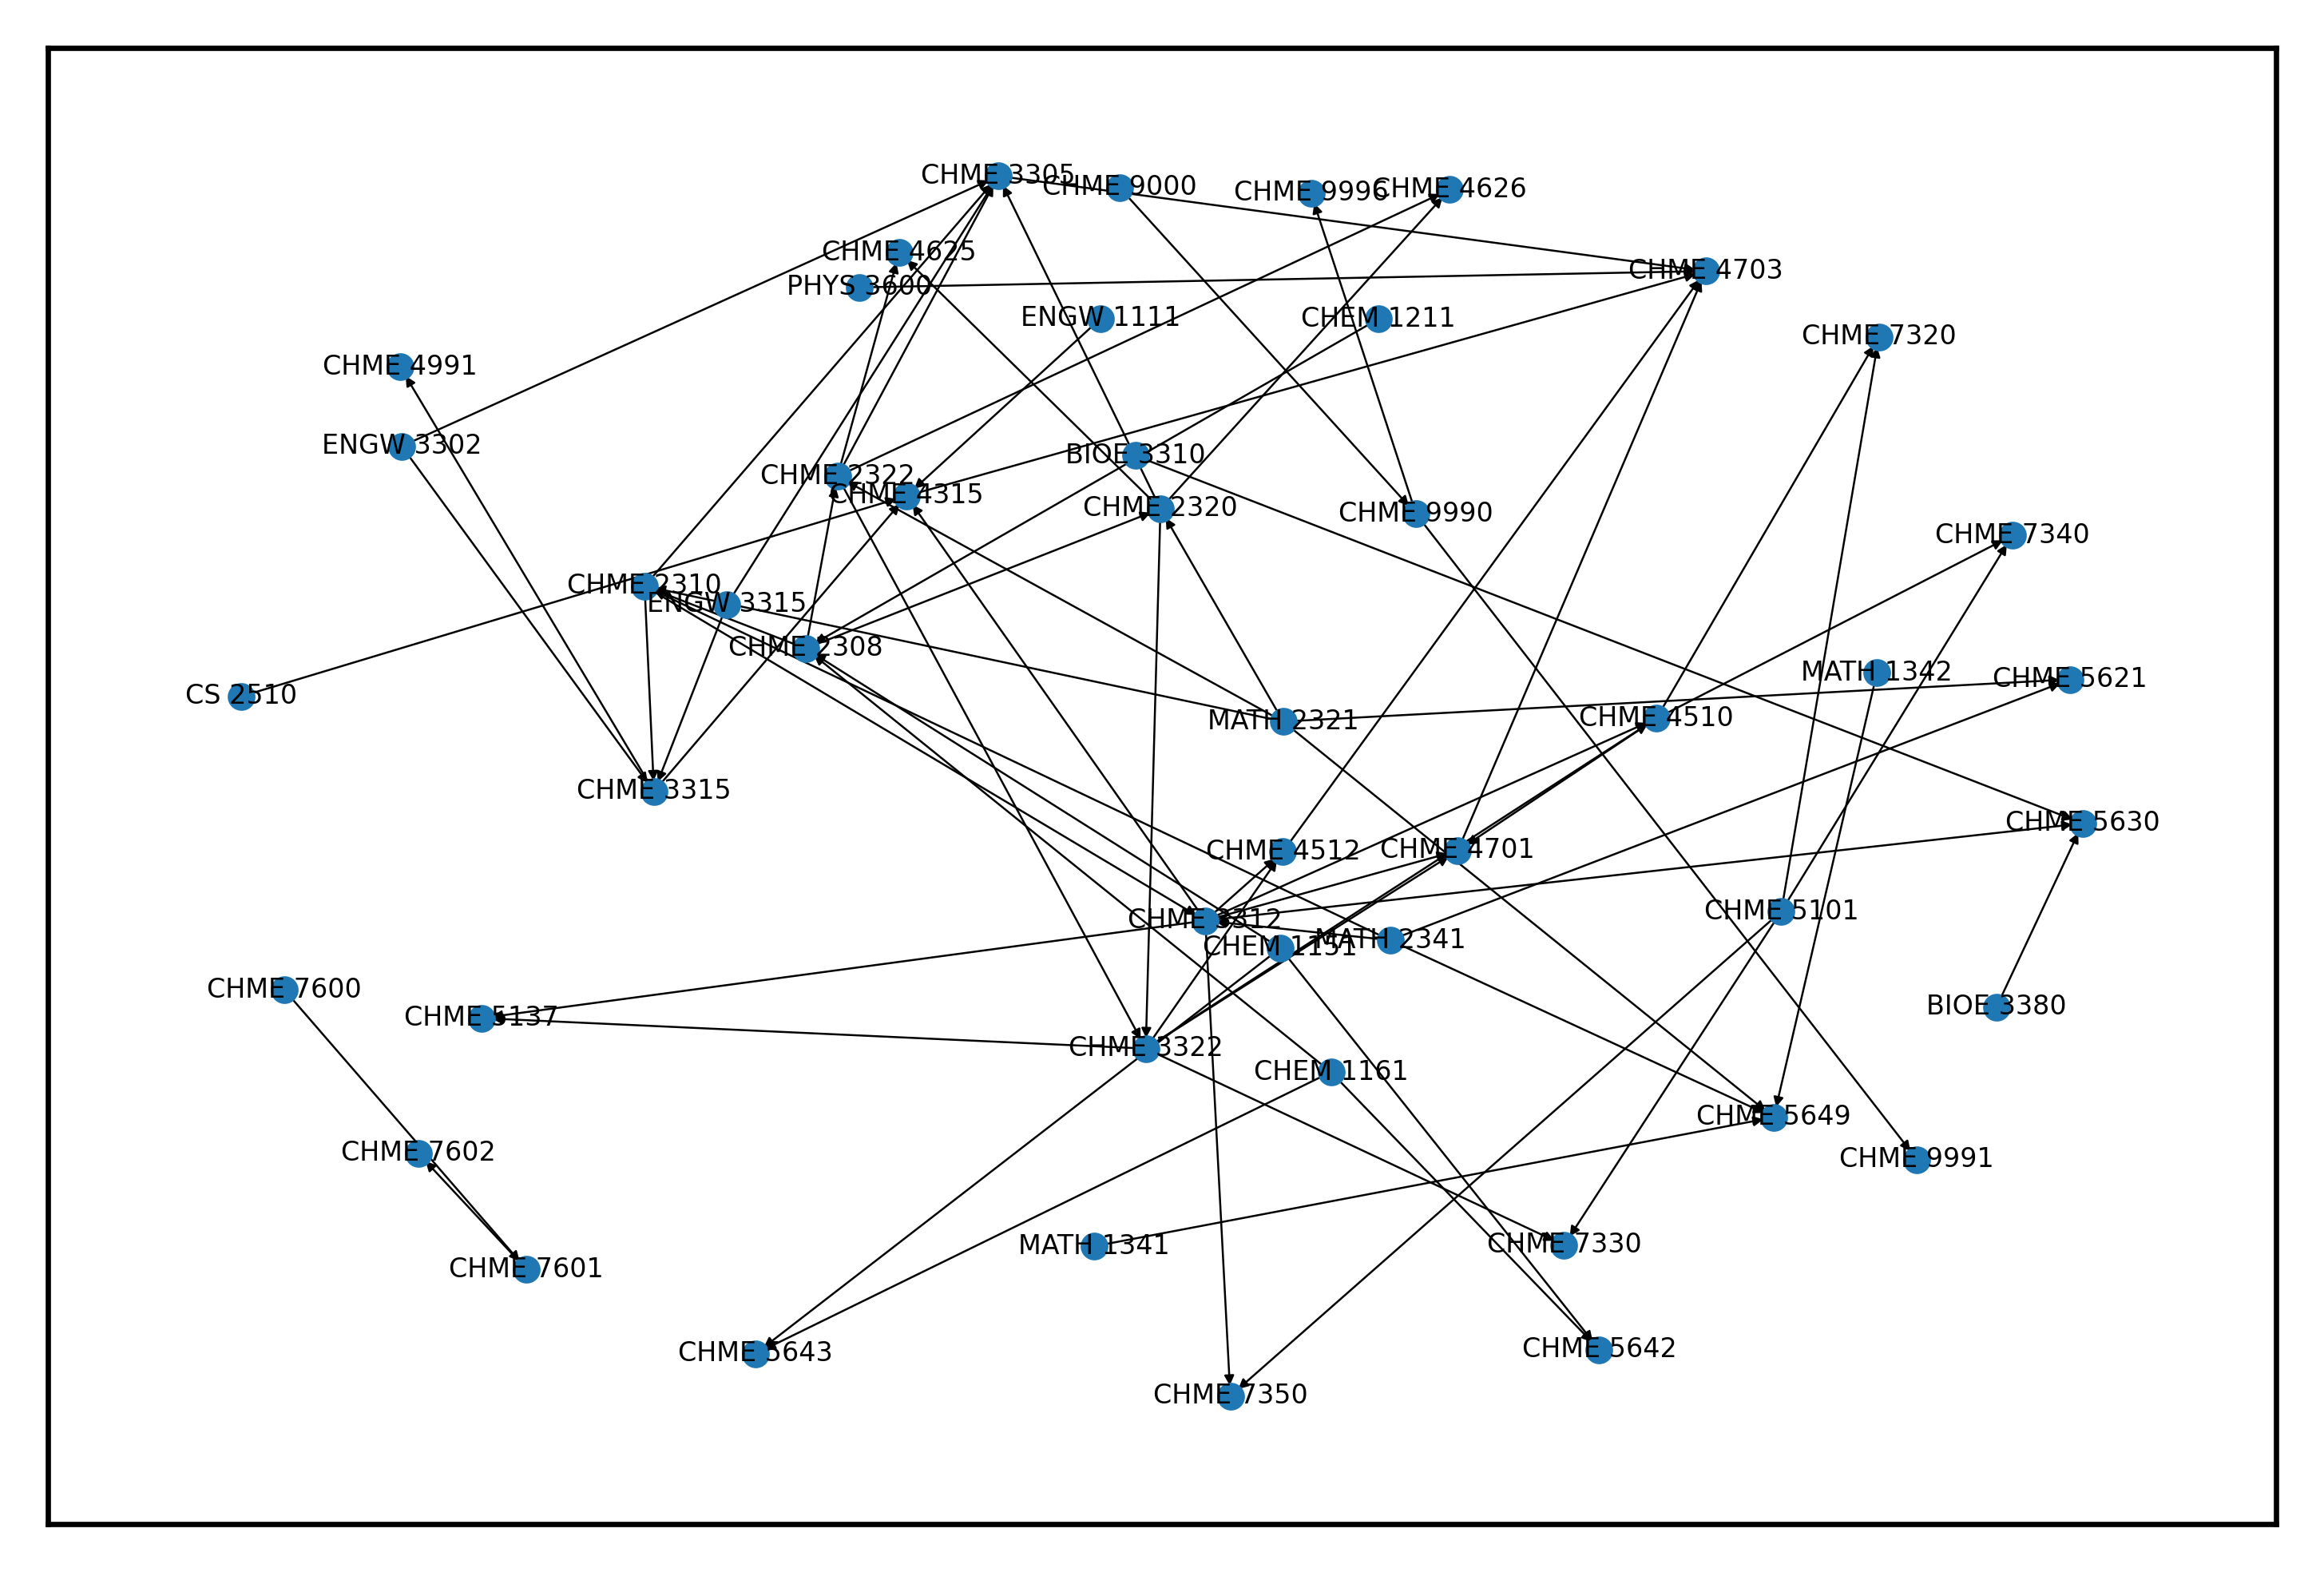

In [670]:
fig_chme = plot_course_prereq_network(G_prereq)
fig_chme

In [671]:
fig_chme.subplots_adjust(left=0, right=1, bottom=0, top=1) # No margin for export
fig_chme.savefig('prereq_chme.png')
fig_chme.savefig('prereq_chme.pdf')

***
### Question 4(c): Average number of prerequisites

In [672]:
def count_prereq_from_network(G):
    prereq_counts = dict(G.in_degree)
    prereq_counts = {k: v for k, v in sorted(prereq_counts.items(), key=lambda item: item[1], reverse=True)}
    return prereq_counts

In [673]:
def average_prereq_from_network(prereq_counts):
    average_prereq_count = 0

    # Avoid calculating mean if there is no prerequisite at all, since it will cause error in np.mean function
    if len(prereq_counts) > 0:
        prereq_counts = [v for k, v in prereq_counts.items()]
        average_prereq_count = np.mean(prereq_counts)
    return average_prereq_count

#### Trying for CHME

In [674]:
prereq_count = count_prereq_from_network(G_prereq)

In [675]:
average_prereq_from_network(prereq_count)

1.4791666666666667

#### Doing the same thing for all departments

In [676]:
def get_department_hrefs():
    catalog_res = requests.get('https://catalog.northeastern.edu/course-descriptions/')
    catalog_html = catalog_res.text

    # Parse raw HTML text
    soup = BeautifulSoup(catalog_html)

    # Get A-to-Z department index
    department_index_div = soup.find('div', id="atozindex")

    url_prefix = 'https://catalog.northeastern.edu'
    department_hrefs = []
    for ul in department_index_div.find_all('ul'):
        for li in ul.find_all('li'):
            department_hrefs.append(url_prefix + li.a.get('href'))
    
    return department_hrefs

In [677]:
def get_department_name_from_url(url):
    dept_name = re.match(r'https://catalog.northeastern.edu/course-descriptions/(.*)/', url).group(1).upper()
    return dept_name

In [678]:
import re

def get_prereq_info(department_url):

    # Get department course catalog
    dept_html = requests.get(department_url).text

    # Get department ID
    dept_name = get_department_name_from_url(department_url)

    # Get course info
    course_infos = get_course_info(dept_html)
    df_courses = pd.DataFrame(course_infos)

    # Make prerequisite graph
    G_prereq = create_course_prereq_network_from_df(dept_name, df_courses)

    # Count metrics from the graph
    prereq_count = count_prereq_from_network(G_prereq)
    mean_degree = average_prereq_from_network(prereq_count)

    return { dept_name: {'graph': G_prereq, 'count': prereq_count, 'mean': mean_degree} }

In [679]:
import time 
prereq_info_dict = {}
department_hrefs = get_department_hrefs()
for department_url in department_hrefs:
    print(department_url)
    prereq_info = get_prereq_info(department_url)
    time.sleep(0.2)
    prereq_info_dict.update(prereq_info)

https://catalog.northeastern.edu/course-descriptions/acct/
https://catalog.northeastern.edu/course-descriptions/acc/
https://catalog.northeastern.edu/course-descriptions/avm/
https://catalog.northeastern.edu/course-descriptions/afam/
https://catalog.northeastern.edu/course-descriptions/afcs/
https://catalog.northeastern.edu/course-descriptions/afrs/
https://catalog.northeastern.edu/course-descriptions/amsl/
https://catalog.northeastern.edu/course-descriptions/aly/
https://catalog.northeastern.edu/course-descriptions/anth/
https://catalog.northeastern.edu/course-descriptions/ant/
https://catalog.northeastern.edu/course-descriptions/apl/
https://catalog.northeastern.edu/course-descriptions/arab/
https://catalog.northeastern.edu/course-descriptions/arch/
https://catalog.northeastern.edu/course-descriptions/army/
https://catalog.northeastern.edu/course-descriptions/art/
https://catalog.northeastern.edu/course-descriptions/artg/
https://catalog.northeastern.edu/course-descriptions/artf/
htt

In [684]:
import pickle

with open("prereq_info_dict.pickle", mode="wb") as file:
    pickle.dump(prereq_info_dict, file)

In [680]:
prereq_means = {}
for name, values in prereq_info_dict.items():
    prereq_mean = values['mean']
    prereq_means.update({name: prereq_mean})

#### Most prerequisites per course, on average

In [682]:
df_prereq_average_by_dept = pd.DataFrame(prereq_means, index=['mean']).T.sort_values(by='mean', ascending=False).head(10)
df_prereq_average_by_dept

,mean
ANTH,2.204545
ENGW,2.200000
ENGL,2.115942
LS,1.800000
PSYC,1.800000
ALY,1.422222
FINA,1.406593
ECON,1.336000
RGA,1.269231
EECE,1.200000


***
### Question 4(d): Longest chain

#### Longest chain for entire courses in Northeastern

In [686]:
# Combine all networks into a single network
G_combined = nx.DiGraph()
for name, values in list(prereq_info_dict.items()):
    G = values['graph']
    G_combined = nx.compose(G_combined, G)

In [687]:
nx.dag_longest_path(G_combined)

['BIOL 1107',
 'BIOL 1113',
 'PHSC 2301',
 'PHSC 2303',
 'HSCI 1105',
 'NRSG 2220',
 'NRSG 3323',
 'NRSG 3320',
 'NRSG 3420',
 'NRSG 4502',
 'NRSG 4995']

In [688]:
len(nx.dag_longest_path(G_combined))

11

#### Longest chain within the department

In [561]:
longest_chains_by_department = {}
for name, values in list(prereq_info_dict.items()):
    print(name)
    G = values['graph']
    longest_chain = nx.dag_longest_path(G)
    n_longest_chain = len(longest_chain)
    longest_chains_by_department.update({name:{'chain':longest_chain, 'count': n_longest_chain}})

ACCT
ACC
AVM
AFAM
AFCS
AFRS
AMSL
ALY
ANTH
ANT
APL
ARAB
ARCH
ARMY
ART
ARTG
ARTF
ARTE
ARTH
ARTD
AACE
ARTS
ASNS
BNSC
BIOC
BIOE
BINF
BIOL
BIO
BIOT
BTC
BUSN
EXSC
CHME
CHEM
CHM
CHNS
CIVE
CED
COMM
CMN
CMMN
CET
CS
CSYE
CMG
COOP
COP
EXED
EEAM
EEBA
EESC
EESH
INNO
CAEP
CRTE
CJS
CRIM
CLTR
CY
DA
DAMG
DS
DEAF
DGM
DGTR
ENVR
ESC
EEMB
ECN
ECNM
ECON
EDUT
EDU
EDUC
EECE
EET
ENSY
ENCP
ENGR
ENLR
EMGT
ESLG
ESL
ENG
ENGL
ENGW
EAI
ENTR
ENVS
EXRE
FINA
FIN
FSEM
FRNH
GAME
GSND
GE
GET
GENS
GIS
GRMN
GST
GBST
HINF
HMG
HSC
HSCI
HLTH
HBRW
HST
HSTY
HIST
HLS
HONR
HRM
HRMG
HSV
HUSV
IE
IS
INFO
ITC
INS
INT
INAM
INSC
INSH
INMI
INPR
INTL
INTB
INTP
ITLN
JPNS
JWSS
JRNL
KORE
LARC
LACS
LWP
LPSC
LW
LAW
LDR
LS
LST
LING
MGT
MISM
MGMT
MGSC
MECN
MKT
MKTG
MATL
MTH
MATM
MATH
MEIE
ME
MET
MSCR
MSCI
MILS
MUS
MUSI
MUSC
MUST
NNMD
NETS
NPM
NRSG
NTR
OR
ORGB
PHSC
PMST
PMCL
PHMD
PHDL
PHL
PHLS
PHIL
PTH
PT
PA
PHY
PHYS
POL
PLSC
POLS
PORT
PJM
PSY
PSYC
PHTH
PPUA
PBR
PREL
RGA
RFA
RMS
RPT
RSSN
SMT
SMFA
SOC
SCLY
SOCL
SPNS
SLPA
SIA
STRT
ABRD
ABRB
ABRC
AB

In [563]:
df_longest_chain = pd.DataFrame(longest_chains_by_department).T.sort_values(by='count', ascending=False)

In [564]:
df_longest_chain.head(10)

,chain,count
PT,"[PT 6330, PT 6340, PT 5138, PT 5150, PT 5540, ...",10
SPNS,"[SPNS 1101, SPNS 1102, SPNS 2101, SPNS 2102, S...",9
EDU,"[EDU 7207, EDU 7225, EDU 7218, EDU 7226, EDU 7...",8
CHME,"[CHEM 1151, CHME 2308, CHME 2310, CHME 3312, C...",7
CHEM,"[CHEM 1211, CHEM 1214, CHEM 2311, CHEM 2313, C...",7
NRSG,"[BIOL 2219, NRSG 2220, NRSG 3323, NRSG 3320, N...",7
ARCH,"[ARCH 1110, ARCH 1120, ARCH 2130, ARCH 2140, A...",7
FRNH,"[FRNH 1101, FRNH 1102, FRNH 2101, FRNH 2102, F...",7
GRMN,"[GRMN 1101, GRMN 1102, GRMN 2101, GRMN 2102, G...",6
BIOL,"[BIOL 1107, BIOL 2299, BIOL 2301, BIOL 3611, B...",6


***
## Question 5

### Dataset
`socfb-American75.mtx`

References
- Ryan A. Rossi and Nesreen K. Ahmed. The Network Data Repository with Interactive Graph Analytics and Visualization. *AAAI*, 2015. https://networkrepository.com.
- Traud, Amanda L and Mucha, Peter J and Porter, Mason A. Social structure of Facebook networks. *Phys. A*, Volume 391, Issue 16, 2012. doi: [10.1016/j.physa.2011.12.021](https://doi.org/10.1016/j.physa.2011.12.021).
- Traud, Amanda L and Kelsic, Eric D and Mucha, Peter J and Porter, Mason A. Comparing Community Structure to Characteristics in Online Collegiate Social Networks. *SIAM Rev*, Volume 53, Issue 3, 2011. doi: [10.1137/080734315](https://doi.org/10.1137/080734315).

### Network overview
- Node: Person (6,386 nodes)
- Edge: Friendship, social relationship on Facebook (217,662 edges)

In [690]:
from scipy.io import mmread
fb_data = mmread('socfb-American75.mtx')

In [691]:
G_fb = nx.Graph(fb_data)

In [692]:
len(list(G_fb.nodes()))

6386

In [693]:
len(list(G_fb.edges()))

217662

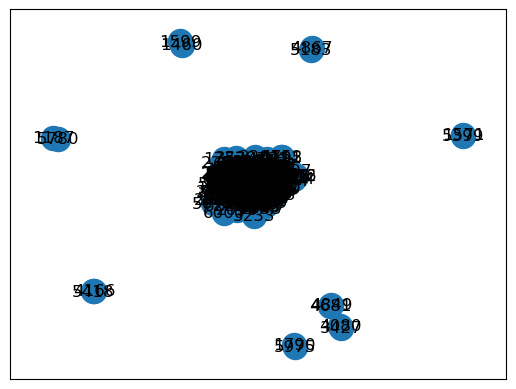

In [7]:
fig1 = nx.draw_networkx(G_fb)

### Randomize network

In [694]:
G_fb_random = G_fb.copy()
G_fb_random = nx.double_edge_swap(G_fb_random, 10000, max_tries=20000)

In [695]:
len(list(G_fb_random.nodes()))

6386

In [696]:
len(list(G_fb_random.edges()))

217662

***
### Question 5(b)

i. Create a figure with three subplots, corresponding to three distributions of your network; write brief interpretations of what you observe.
These can be distributions of node properties (i.e. degree, centrality measures, etc.) or edge properties (i.e. edge weights). Be sure to bin these distributions appropriately.

In [773]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#### Question 5(b)

In [ ]:
def plot_degree_distribution(ax, G, number_of_bins=10):

    def make_degree_distribution(G, number_of_bins=15, log_binning=True, density=True):
        """
        Given a degree sequence, return the y values (probability) and the
        x values (support) of a degree distribution that you're going to plot.
        
        Parameters
        ----------
        G (nx.Graph):
            the network whose degree distribution to calculate
    
        number_of_bins (int):
            length of output vectors
        
        log_binning (bool):
            if you are plotting on a log-log axis, then this is useful
        
        density (bool):
            whether to return counts or probability density (default: True)
            Note: probability densities integrate to 1 but do not sum to 1. 
            
        Returns
        -------
        hist, bins (np.ndarray):
            probability density if density=True node counts if density=False; binned edges
        
        """
        
        # Step 1: We will first need to define the support of our distribution
        k = list(dict(G.degree()).values()) # get the degree of each node
        kmax = np.max(k)                    # get the maximum degree
        
        # Step 2: Then we'll need to construct bins
        if log_binning:
            # array of bin edges including rightmost and leftmost
            bins = np.logspace(0,np.log10(kmax+1),number_of_bins+1)
        
        else:
            bins = np.linspace(0,kmax+1,num=number_of_bins+1)
        
        # Step 3: Then we can compute the histogram using numpy
        hist, _ = np.histogram(k,bins,density=density)
    
        return bins[1:], hist
    
    deg_dist_x, deg_dist_y = make_degree_distribution(G, number_of_bins)
    
    ax.loglog(deg_dist_x, deg_dist_y, marker='o', lw=0)
    
    ax.set_title("Degree Distribution")
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")

In [942]:
def plot_betweenness_centrality_dist(ax, betweenness_centrality_list):

    counts, bins = np.histogram(betweenness_centrality_list, bins=100)
    
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    ax.scatter(bin_centers, counts)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('Betweenness Centrality Distribution')
    ax.set_xlabel("Betweenness Centrality")
    ax.set_ylabel("Frequency")


In [ ]:
# betweenness_centrality = nx.betweenness_centrality(G_fb)

In [ ]:
betweenness_centrality_list = list(betweenness_centrality.values())

In [954]:
betweenness_centrality_random = nx.betweenness_centrality(G_fb_random)


KeyboardInterrupt



In [ ]:
betweenness_centrality_random_list = list(betweenness_centrality_random.values())

In [ ]:
# shortest_path_length = list(nx.all_pairs_shortest_path_length(G_fb))
# shortest_path_length_random = list(nx.all_pairs_shortest_path_length(G_fb_random))

#### Question 5(b) (i) - original network

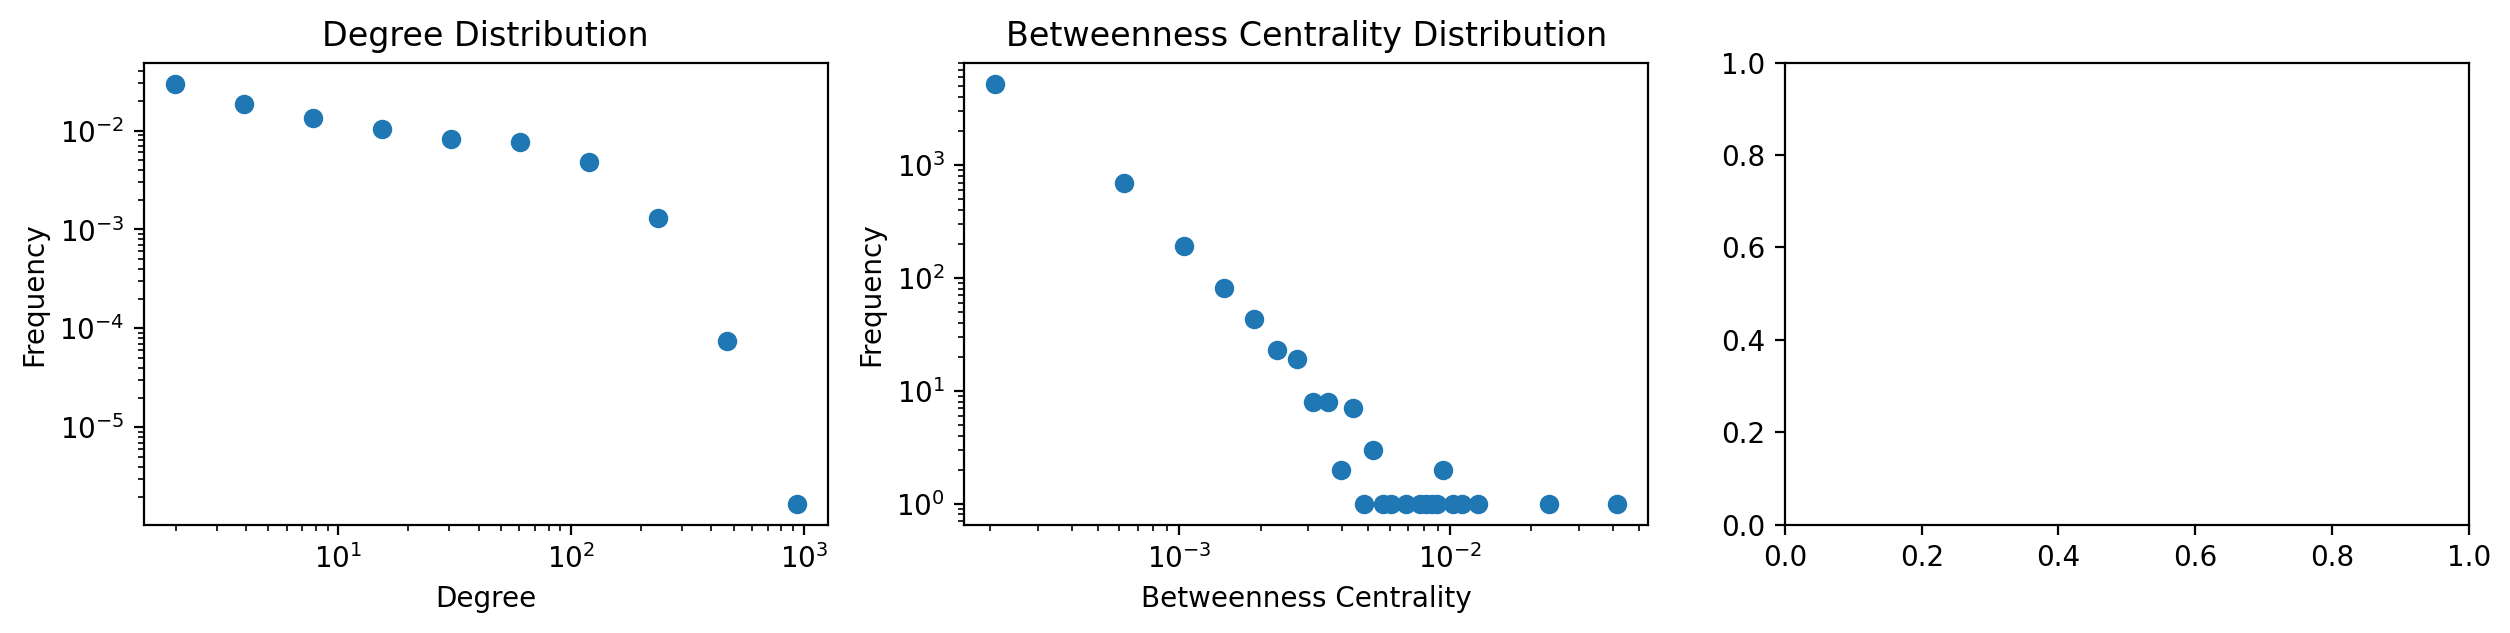

In [968]:
fb_fig, fb_axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

plot_degree_distribution(fb_axs[0], G_fb, number_of_bins=10)
plot_betweenness_centrality_dist(fb_axs[1], betweenness_centrality_list)
fb_fig.savefig('fb_original.png')
fb_fig.savefig('fb_original.pdf')

#### Question 5(b) (ii) - randomized network

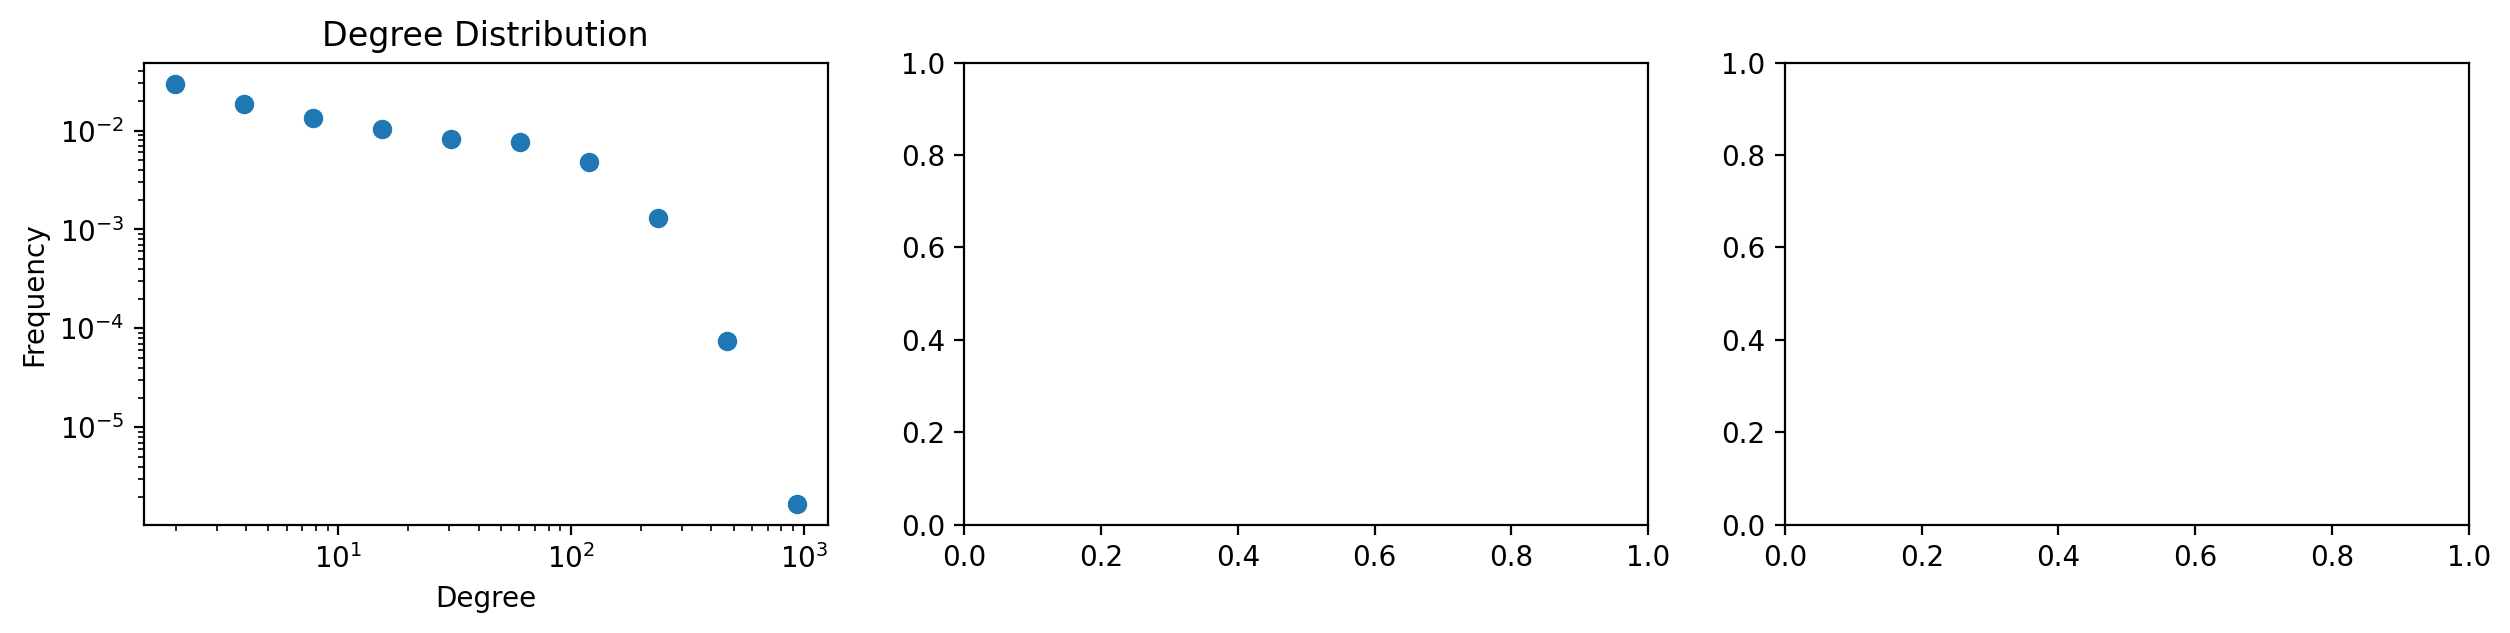

In [969]:
fb_random_fig, fb_random_axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

plot_degree_distribution(fb_random_axs[0], G_fb_random, number_of_bins=10)
fb_random_fig.savefig('fb_random.png')
fb_random_fig.savefig('fb_random.pdf')